In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('regression/challenge1.csv')

In [3]:
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


Data looks neat.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
loc1     10000 non-null object
loc2     10000 non-null object
para1    10000 non-null int64
dow      10000 non-null object
para2    10000 non-null int64
para3    10000 non-null float64
para4    10000 non-null float64
price    10000 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


Doesn't seem to have any missing values.

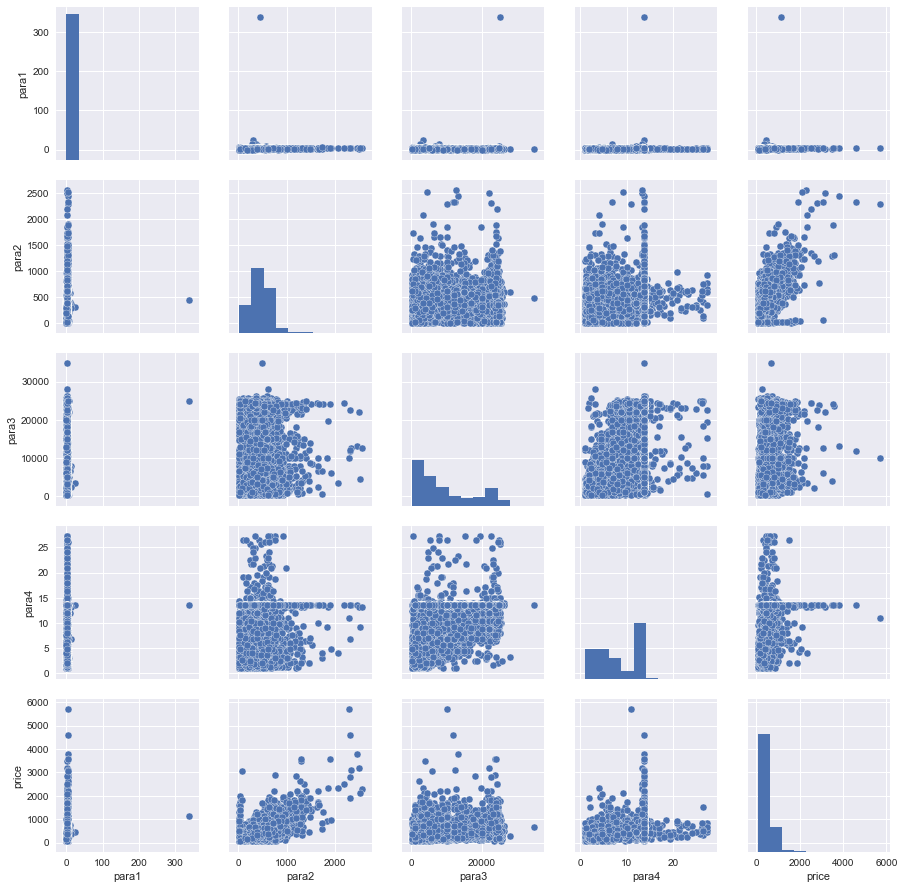

In [6]:
sns.pairplot(df)

There are some signs of correlation, but clearly there are outliers as well.

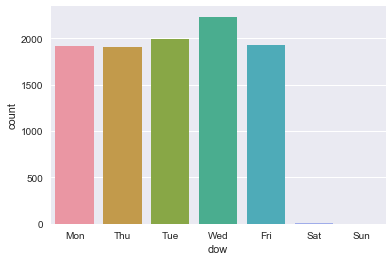

In [8]:
sns.countplot(df.dow)

Looks like there are no items sold on the weekend, except on a rare occasion.

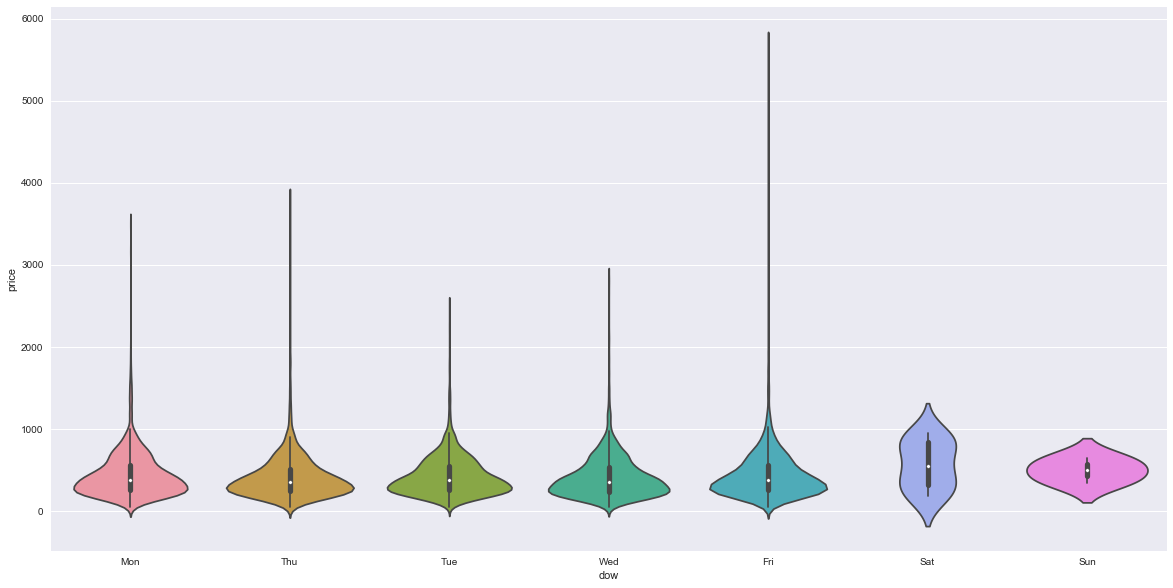

In [10]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df.dow,y=df.price)

Ditribution of prices seems normal, with a few outliers.

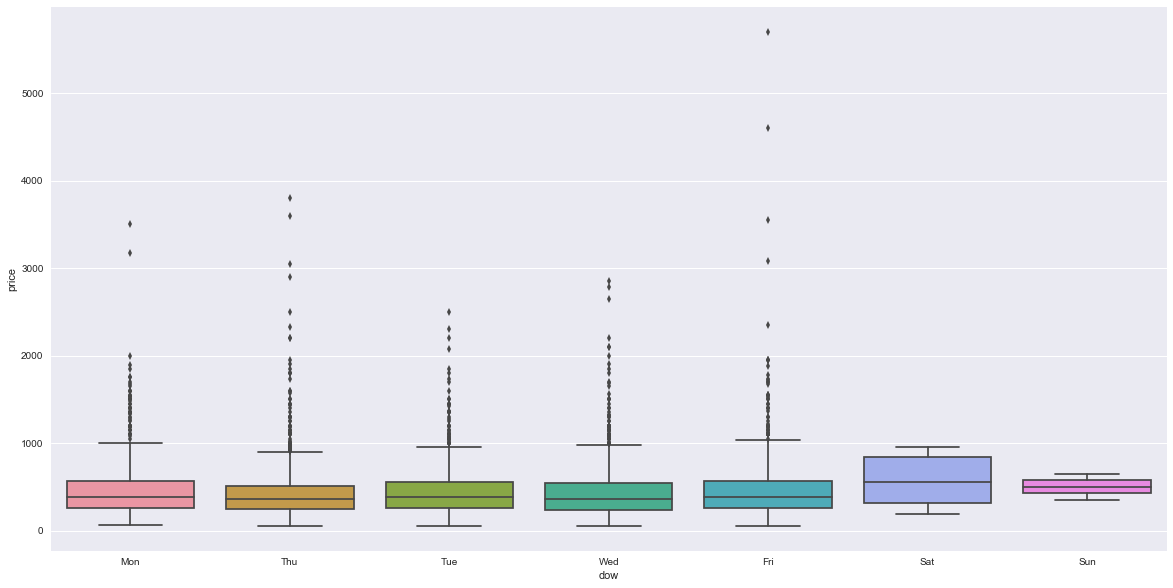

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.dow,y=df.price)

This boxplot confirms the presence of outliers.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Initially I'm gonna use a Random Forest Regressor as my ML model.

In [45]:
rf = RandomForestRegressor(n_estimators=1000)

In [17]:
X = df.drop(['price','dow'],axis=1)

In [19]:
y= df.price

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
rf.fit(X_train,y_train)

ValueError: could not convert string to float: 'TS'

This returns an error because loc1 has string values!

In [22]:
df.loc1.value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
S       1
T       1
Name: loc1, dtype: int64

There's our culprit.

In [26]:
df.loc2.value_counts().tail()

0C    1
S6    1
0T    1
0N    1
43    1
Name: loc2, dtype: int64

Just curious to see if loc2 has string values... and voila of course it does!

In [27]:
df = df[df.loc2.apply(lambda x: x.isnumeric())]

In [28]:
df = df[df.loc1.apply(lambda x: x.isnumeric())]

Filtering the dataframe so only the numerical values stay.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 8 columns):
loc1     9993 non-null object
loc2     9993 non-null object
para1    9993 non-null int64
dow      9993 non-null object
para2    9993 non-null int64
para3    9993 non-null float64
para4    9993 non-null float64
price    9993 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 702.6+ KB


Lost 7 data points, so thats not too bad.

In [46]:
X = df.drop(['price','dow'],axis=1)

In [47]:
y= df.price

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
rf.score(X_test,y_test)

0.69127696629732061

In [51]:
preds = rf.predict(X_test)

In [52]:
metrics.r2_score(y_test,preds)

0.69127696629732061

In [53]:
rf.feature_importances_

array([ 0.01775082,  0.0682336 ,  0.04125322,  0.49440285,  0.07551283,
        0.30284668])

Looks like para2 and para4 are important predictors

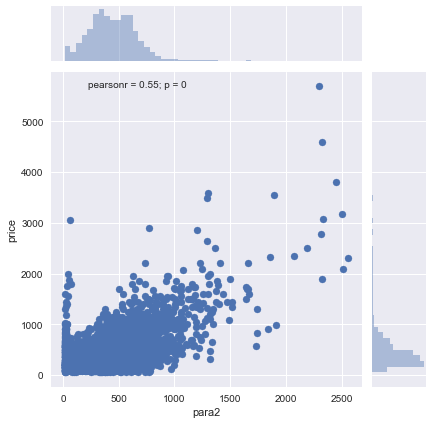

In [54]:
sns.jointplot(df.para2,df.price)

Signs of correlation.

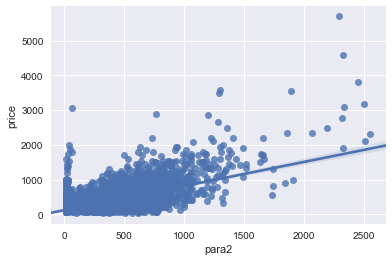

In [55]:
sns.regplot(df.para2, df.price)

Randomly trying to fit a linear regression line.

In [70]:
from sklearn.linear_model import LinearRegression

Going to fit a linear regression model.

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
lr.score(X_test,y_test)

0.57221622703542807

In [74]:
lr.intercept_

-119.06686618049707

In [75]:
lr.coef_

array([  4.70433310e+00,  -6.12564028e-01,   2.49246600e+00,
         6.80646571e-01,   2.17915108e-05,   2.97678927e+01])

The coefficients do not look too bad.

In [76]:
from sklearn.linear_model import Ridge,Lasso

In [86]:
ridge = Ridge(alpha=2)

In [87]:
ridge.fit(X_train,y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
ridge.score(X_test,y_test)

0.57221609449517197

In [80]:
lasso = Lasso()

In [81]:
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lasso.score(X_test,y_test)

0.57217432299737636

Both ridge and lasso do not show any signs of hope. Maybe they require some hyperparameter tuning.

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
gbr = GradientBoostingRegressor(max_depth=7)

In [120]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [121]:
gbr.score(X_test,y_test)

0.67813554254230124

The gradient boosting regressor does pretty well without any tuning.

In [122]:
from sklearn.grid_search import GridSearchCV

In [123]:
params ={'max_depth':[3,4,5,6,7,8,9,10,11,12,13]}

In [124]:
gc = GridSearchCV(gbr,param_grid=params,n_jobs=-1)

In [125]:
gc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [126]:
gc.best_score_

0.6680531736782498

Surprising to see that there isnt really an improvement in score.

In [127]:
gc.best_params_

{'max_depth': 5}

In [130]:
new_X = df.drop(['price','dow','loc1','loc2'],axis=1)

In [131]:
y = df.price

In [132]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.33, random_state=42)

In [136]:
gbr = GradientBoostingRegressor(max_depth=5)

In [137]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [138]:
gbr.score(X_test,y_test)

0.68059816956885222

Trying different set of features to see if model score improves.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C876007B8>]], dtype=object)

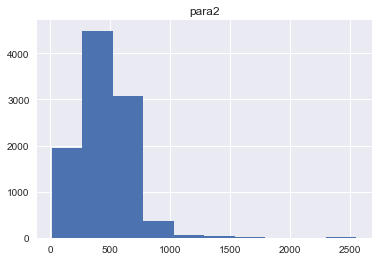

In [139]:
df.hist(column='para2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C89674470>]], dtype=object)

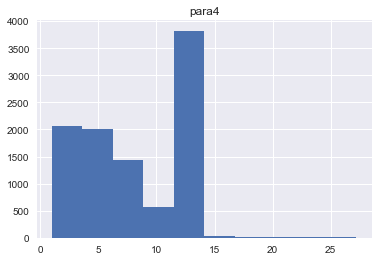

In [140]:
df.hist(column='para4')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CB4561EB8>]], dtype=object)

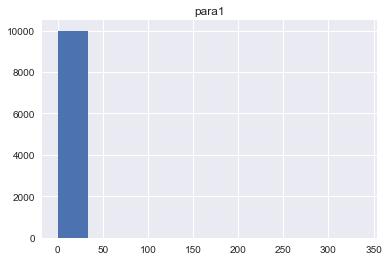

In [141]:
df.hist(column='para1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015CB4605278>]], dtype=object)

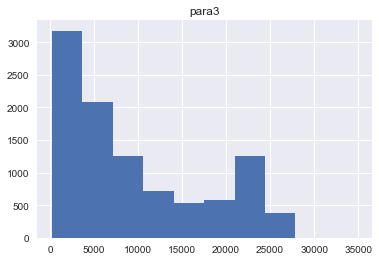

In [142]:
df.hist(column='para3')

Seems like para1 and para3 which are not really important features appear to have several 0 and close to 0 values.

In [143]:
gbr.feature_importances_

array([ 0.09215652,  0.44547749,  0.2930865 ,  0.16927948])

In [144]:
X.columns

Index(['para1', 'para2', 'para3', 'para4'], dtype='object')

In [147]:
joined_df=df.join(pd.get_dummies(df['dow']))

Here I'm breaking down the day of the week feature to see if I can improve my model based on categorical variables.

In [148]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 15 columns):
loc1     9993 non-null object
loc2     9993 non-null object
para1    9993 non-null int64
dow      9993 non-null object
para2    9993 non-null int64
para3    9993 non-null float64
para4    9993 non-null float64
price    9993 non-null float64
Fri      9993 non-null uint8
Mon      9993 non-null uint8
Sat      9993 non-null uint8
Sun      9993 non-null uint8
Thu      9993 non-null uint8
Tue      9993 non-null uint8
Wed      9993 non-null uint8
dtypes: float64(3), int64(2), object(3), uint8(7)
memory usage: 1.1+ MB


In [159]:
new_X = joined_df.drop(['price','dow'],axis=1)

In [160]:
y= joined_df.price

In [161]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.33, random_state=42)

In [162]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [163]:
rf.score(X_test,y_test)

0.69022901080252885

In [166]:
rf.feature_importances_

array([  1.66478717e-02,   6.22673947e-02,   3.79733749e-02,
         4.84960777e-01,   6.74107192e-02,   3.01047365e-01,
         6.65894208e-03,   5.24867328e-03,   3.35990523e-04,
         2.20302316e-05,   6.14422339e-03,   5.56773295e-03,
         5.71490491e-03])

They seem to have no effect at all!

Due to the time limit, I'm gonna have to work on other problems as well. So my model will be the Random Forest Regressor with an R2 score of around 70 percent. Given more time, I could have performed cross validation and tried different scaling/normalizing/regularizing techniques to see if they actually benefit the model at all.